<a href="https://colab.research.google.com/github/Nandan0402/AI-ML-Projects-Getskilled/blob/main/Energy_efficiency_prediction_and_rating_system_using_regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Assuming the user uploads a file named 'complete.csv'
if 'complete.csv' in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded['complete.csv']), parse_dates=['date'])
    df.head()
else:
    print("Error: 'complete.csv' was not uploaded. Please upload the file named 'complete.csv'.")

Saving complete.csv to complete.csv


In [3]:
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_7,T8,RH_8,T9,RH_9,rv1,rv2,hour,day_of_week,month
0,2016-01-01 00:00:00,50,0,20,40,21,42,22,45,23,...,52,20,48,21,49,0.0,0.0,0,4,1
1,2016-01-01 01:00:00,51,1,21,41,22,43,23,46,24,...,53,21,49,22,50,0.1,0.2,1,4,1
2,2016-01-01 02:00:00,52,2,22,42,23,44,24,47,25,...,54,22,50,23,51,0.2,0.4,2,4,1
3,2016-01-01 03:00:00,53,3,23,43,24,45,25,48,23,...,55,20,51,24,52,0.3,0.6,3,4,1
4,2016-01-01 04:00:00,54,4,24,44,21,46,26,49,24,...,56,21,52,25,53,0.4,0.8,4,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         200 non-null    datetime64[ns]
 1   Appliances   200 non-null    int64         
 2   lights       200 non-null    int64         
 3   T1           200 non-null    int64         
 4   RH_1         200 non-null    int64         
 5   T2           200 non-null    int64         
 6   RH_2         200 non-null    int64         
 7   T3           200 non-null    int64         
 8   RH_3         200 non-null    int64         
 9   T4           200 non-null    int64         
 10  RH_4         200 non-null    int64         
 11  T5           200 non-null    int64         
 12  RH_5         200 non-null    int64         
 13  T6           200 non-null    int64         
 14  RH_6         200 non-null    int64         
 15  T7           200 non-null    int64         
 16  RH_7    

In [5]:
X = df.drop(['date','Appliances'],axis=1)
y = df['Appliances']

In [6]:
X = X.drop(['rv1','rv2'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,hour,day_of_week,month
79,19,24,49,24,49,23,47,24,51,27,...,62,22,59,21,49,25,51,7,0,1
197,17,22,47,22,47,27,46,25,49,25,...,63,20,57,22,53,23,50,5,5,1
38,18,23,48,23,48,24,48,25,50,26,...,57,21,58,22,50,24,52,14,5,1
24,4,24,44,21,42,22,48,23,51,24,...,61,19,52,20,48,25,52,0,5,1
122,2,22,42,23,44,24,48,25,49,26,...,60,21,54,22,50,23,52,2,2,1


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)

In [10]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
print("R2 Score:",r2_score(y_test,y_pred))
print("RMSE", mean_squared_error(y_test,y_pred))

R2 Score: 0.9070406498096646
RMSE 174.1137925


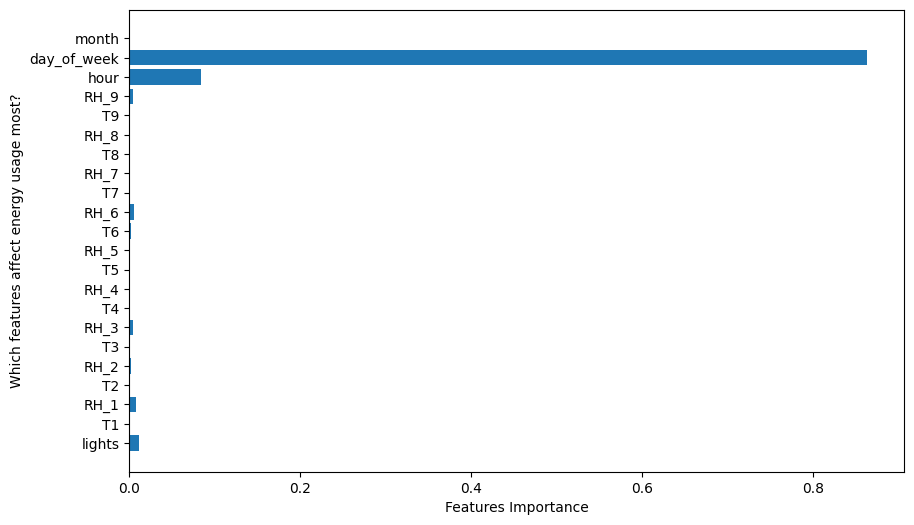

In [12]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(feat_names, importances)
plt.xlabel("Features Importance")
plt.ylabel("Which features affect energy usage most?")
plt.show()